Installation of Required Package

In [1]:
%pip install transformers[sentencepiece] datasets rouge_score py7zr -q

Note: you may need to restart the kernel to use updated packages.


Importing Required Libraries

In [3]:
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
nltk.download ('punkt')
from datasets import load_metric

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
df = pd.read_parquet('preprocessed_data.parquet') # Reading preprocessed dataset

In [7]:
# Set the seed for reproducibility of random operations
set_seed(42)

# Extract the first 1000 characters from the 'article' column of the second row in the DataFrame
sample_text = df.iloc[1]['article'][:1000]
summaries = {}

In [8]:
# Define a function to generate a baseline summary consisting of the first three sentences
def baseline_summary_three_sent(text):
  return "\n".join(sent_tokenize(text)[:3])

## **Setup GPT-2 Model**

In [9]:
pipe = pipeline("text-generation", model="gpt2-medium")
gpt2_query = sample_text + "\nTL;DR:\n"
pipe_out = pipe(gpt2_query, max_length=512, clean_up_tokenization_spaces=True, truncation=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [10]:
# Ensure there are only 10 articles
data = df.iloc[:500]

# Initialize the GPT-2 pipeline
pipe = pipeline("text-generation", model="gpt2-medium")

# Define a function to generate baseline summary (first 3 sentences)
def baseline_summary_three_sent(text):
    return "\n".join(sent_tokenize(text)[:3])

# Initialize an empty dictionary to store summaries
summaries = {}

# Iterate over the articles in the dataset
for i in range(len(data)):
    # Extract the article text (limited to the first 1000 characters)
    sample_text = data.iloc[i]['article'][:1000]

    # Generate the baseline summary
    summaries[f'baseline_{i}'] = baseline_summary_three_sent(sample_text)

    # Prepare the query for GPT-2
    gpt2_query = sample_text + "\nTL;DR:\n"

    # Generate the summary using GPT-2
    pipe_out = pipe(gpt2_query, max_length=512, clean_up_tokenization_spaces=True, truncation=True)

    # Store the GPT-2 generated summary, trimming the "TL;DR:" part
    summaries[f'gpt2_{i}'] = "\n".join(sent_tokenize(pipe_out[0]['generated_text'][len(gpt2_query):]))

# Print all the summaries along with the ground truth abstracts
for i in range(len(data)):
    print(f'Article {i+1} Ground Truth')
    print(data.iloc[i]['abstract'])
    print()
    print(f'BASELINE SUMMARY {i+1}')
    print(summaries[f'baseline_{i}'])
    print()
    print(f'GPT-2 SUMMARY {i+1}')
    print(summaries[f'gpt2_{i}'])
    print('-' * 80)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Streaming output truncated to the last 5000 lines.
2.1 - Molecular assembly, oligomer interaction, and their importance to amyloid pathology.
It seems obvious that when the amyloid oligomer is joined to polypeptide, it can cause all sorts of unintended effects.
The oligomer will combine with polypeptide form to form amyloid-dendritic membranes, and they can form a new chain of protein in the presence of other polypeptides.
While the oligomer can act only on the host, it can interfere with the replication of the host and can contribute to its pathological properties.
For a large group of polypeptide sequences, polypeptide fibrils contribute at least in part to what is a very important function of each.
For a small subset, however, oligomer interactions contribute to the amyloid formation in amyloid, thus increasing our knowledge of which polypeptides are important for which diseases, and can provide insights into what might occur from oligomer interactions to create neuroprotective agen

In [11]:
# Calculating ROUGE metrics
rouge_metric = load_metric('rouge')
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

<ipython-input-11-3284abf12730>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge_metric = load_metric('rouge')


The repository for rouge contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/rouge.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [12]:
# Store the results in a dictionary
records = []

# Loop through each summary (both baseline and GPT-2) and calculate ROUGE scores
for i in range(len(data)):
    reference = data.iloc[i]['abstract']

    # Compute ROUGE scores for baseline summary
    rouge_metric.add(prediction=summaries[f'baseline_{i}'], reference=reference)
    baseline_score = rouge_metric.compute()
    baseline_rouge_dict = dict((rn, baseline_score[rn].mid.fmeasure) for rn in rouge_names)

    # Compute ROUGE scores for GPT-2 generated summary
    rouge_metric.add(prediction=summaries[f'gpt2_{i}'], reference=reference)
    gpt2_score = rouge_metric.compute()
    gpt2_rouge_dict = dict((rn, gpt2_score[rn].mid.fmeasure) for rn in rouge_names)

    # Store the scores in the records list
    records.append({
        'article_index': i + 1,
        'baseline_rouge1': baseline_rouge_dict['rouge1'],
        'baseline_rouge2': baseline_rouge_dict['rouge2'],
        'baseline_rougeL': baseline_rouge_dict['rougeL'],
        'gpt2_rouge1': gpt2_rouge_dict['rouge1'],
        'gpt2_rouge2': gpt2_rouge_dict['rouge2'],
        'gpt2_rougeL': gpt2_rouge_dict['rougeL'],
    })

# Convert the records to a DataFrame
results_df = pd.DataFrame.from_records(records)

# Display the results DataFrame
print(results_df)

     article_index  baseline_rouge1  baseline_rouge2  baseline_rougeL  \
0                1         0.211480         0.085106         0.132931   
1                2         0.331915         0.120172         0.195745   
2                3         0.088889         0.000000         0.044444   
3                4         0.181818         0.025000         0.099174   
4                5         0.278746         0.098246         0.174216   
..             ...              ...              ...              ...   
495            496         0.162162         0.040816         0.081081   
496            497         0.278075         0.140541         0.213904   
497            498         0.219269         0.053512         0.139535   
498            499         0.196364         0.029304         0.087273   
499            500         0.089457         0.012862         0.044728   

     gpt2_rouge1  gpt2_rouge2  gpt2_rougeL  
0       0.171875     0.019608     0.097656  
1       0.240437     0.038462    

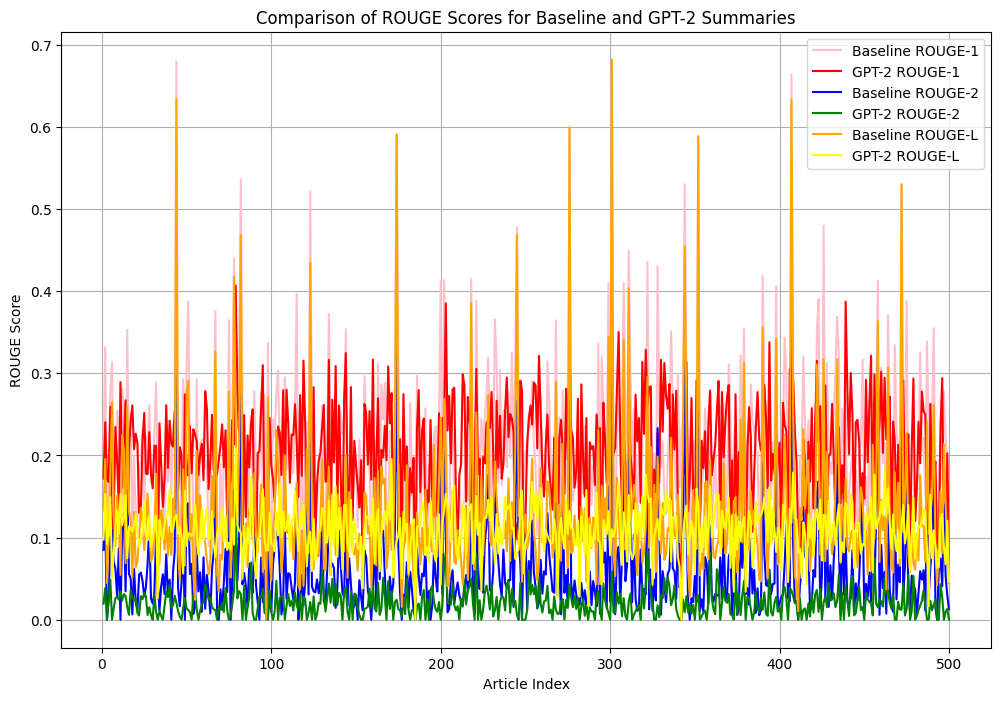

In [13]:
# Plot the ROUGE scores for each article
plt.figure(figsize=(12, 8))

# Plot for ROUGE-1
plt.plot(results_df['article_index'], results_df['baseline_rouge1'], label='Baseline ROUGE-1', color='pink')
plt.plot(results_df['article_index'], results_df['gpt2_rouge1'], label='GPT-2 ROUGE-1', color='red')

# Plot for ROUGE-2
plt.plot(results_df['article_index'], results_df['baseline_rouge2'], label='Baseline ROUGE-2', color='blue')
plt.plot(results_df['article_index'], results_df['gpt2_rouge2'], label='GPT-2 ROUGE-2', color='green')

# Plot for ROUGE-L
plt.plot(results_df['article_index'], results_df['baseline_rougeL'], label='Baseline ROUGE-L', color='orange')
plt.plot(results_df['article_index'], results_df['gpt2_rougeL'], label='GPT-2 ROUGE-L', color='yellow')

plt.title('Comparison of ROUGE Scores for Baseline and GPT-2 Summaries')
plt.xlabel('Article Index')
plt.ylabel('ROUGE Score')
plt.legend()
plt.grid(True)
plt.show()